In [4]:
import os
import numpy as np
import pandas as pd
from pandas import Series
from scipy import optimize
from matplotlib import ticker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.optimize import leastsq
import matplotlib.dates as mdates
from matplotlib.pyplot import MultipleLocator
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter

~~~
说明：
①olhc.csv文件中的judge字段：使用excel的if函数，如果close字段值大于0（即交易日当天为上涨），则记为1，否则记为0。
②确定红色和绿色的16进制编码后，使用excel进行color字段的填充，之后绘图
~~~

In [2]:
colors_450 = ["#e98888","#e98888","#e98888","#e98888","#e98888","#7eb17e","#e98888","#7eb17e","#e98888","#e98888","#e98888","#e98888","#7eb17e","#e98888","#e98888","#7eb17e","#7eb17e","#e98888","#e98888","#e98888","#7eb17e","#e98888","#e98888","#e98888","#e98888","#7eb17e","#7eb17e","#7eb17e","#e98888","#7eb17e","#e98888","#e98888","#7eb17e","#e98888","#e98888","#e98888","#e98888","#e98888","#7eb17e","#7eb17e","#7eb17e","#7eb17e","#7eb17e","#e98888","#7eb17e","#7eb17e","#7eb17e","#e98888","#e98888","#e98888","#e98888","#e98888","#e98888","#e98888","#7eb17e","#e98888","#e98888","#e98888","#7eb17e","#e98888","#7eb17e","#7eb17e","#e98888","#7eb17e","#e98888","#e98888","#e98888","#e98888","#e98888","#e98888","#e98888","#e98888","#e98888","#e98888","#7eb17e","#e98888","#e98888","#e98888","#7eb17e","#e98888","#e98888","#e98888","#e98888","#e98888","#7eb17e","#e98888","#e98888","#e98888","#7eb17e","#e98888","#e98888","#7eb17e","#e98888","#e98888","#e98888","#7eb17e","#e98888","#7eb17e","#e98888","#7eb17e","#e98888","#7eb17e","#7eb17e","#7eb17e","#e98888","#e98888","#e98888","#7eb17e","#e98888","#7eb17e","#7eb17e","#e98888","#e98888","#e98888","#e98888","#e98888","#e98888","#e98888","#7eb17e","#7eb17e","#e98888","#e98888","#7eb17e","#e98888","#e98888","#e98888","#7eb17e","#7eb17e","#e98888","#e98888","#7eb17e","#7eb17e","#e98888","#7eb17e","#7eb17e","#e98888","#e98888","#7eb17e","#7eb17e","#7eb17e","#e98888","#7eb17e","#7eb17e","#7eb17e","#e98888","#7eb17e","#7eb17e","#e98888","#e98888","#e98888","#7eb17e","#7eb17e","#e98888","#e98888","#e98888","#e98888","#e98888","#e98888","#7eb17e","#7eb17e","#7eb17e","#e98888","#7eb17e","#7eb17e","#7eb17e","#e98888","#7eb17e","#7eb17e","#e98888","#e98888","#7eb17e","#7eb17e","#e98888","#e98888","#e98888","#7eb17e","#e98888","#7eb17e","#7eb17e","#7eb17e","#7eb17e","#7eb17e","#e98888","#e98888","#7eb17e","#7eb17e","#7eb17e","#7eb17e","#e98888","#e98888","#7eb17e","#e98888","#7eb17e","#7eb17e","#e98888","#7eb17e","#e98888","#e98888","#e98888","#7eb17e","#e98888","#7eb17e","#e98888","#7eb17e","#e98888","#e98888","#e98888","#e98888","#e98888","#7eb17e","#e98888","#e98888","#7eb17e","#e98888","#7eb17e","#e98888","#e98888","#e98888","#e98888","#7eb17e","#e98888","#7eb17e","#7eb17e","#7eb17e","#e98888","#e98888","#e98888","#e98888","#7eb17e","#e98888","#7eb17e","#7eb17e","#e98888","#7eb17e","#7eb17e","#e98888","#e98888","#7eb17e","#e98888","#e98888","#7eb17e","#7eb17e","#e98888","#e98888","#e98888","#e98888","#7eb17e","#e98888","#7eb17e","#e98888","#7eb17e","#7eb17e","#e98888","#7eb17e","#e98888","#e98888","#7eb17e","#e98888","#e98888","#7eb17e","#7eb17e","#e98888","#7eb17e","#e98888","#e98888","#7eb17e","#7eb17e","#7eb17e","#e98888","#7eb17e","#e98888","#7eb17e","#e98888","#7eb17e","#e98888","#7eb17e","#e98888","#e98888","#7eb17e","#7eb17e","#e98888","#e98888","#7eb17e","#7eb17e","#7eb17e","#e98888","#7eb17e","#e98888","#7eb17e","#e98888","#7eb17e","#7eb17e","#e98888","#e98888","#7eb17e","#7eb17e","#e98888","#7eb17e","#e98888","#7eb17e","#e98888","#7eb17e","#e98888","#e98888","#e98888","#e98888","#e98888","#e98888","#7eb17e","#7eb17e","#e98888","#e98888","#e98888","#e98888","#e98888","#e98888","#e98888","#7eb17e","#e98888","#7eb17e","#e98888","#7eb17e","#7eb17e","#e98888","#e98888","#e98888","#e98888","#7eb17e","#7eb17e","#7eb17e","#e98888","#7eb17e","#e98888","#e98888","#7eb17e","#7eb17e","#e98888","#7eb17e","#7eb17e","#e98888","#7eb17e","#e98888","#7eb17e","#7eb17e","#7eb17e","#e98888","#7eb17e","#e98888","#7eb17e","#7eb17e","#e98888","#e98888","#7eb17e","#7eb17e","#e98888","#7eb17e","#7eb17e","#7eb17e","#e98888","#e98888","#7eb17e","#7eb17e","#e98888","#7eb17e","#e98888","#e98888","#7eb17e","#e98888","#e98888","#7eb17e","#e98888","#7eb17e","#7eb17e","#e98888","#e98888","#7eb17e","#e98888","#e98888","#7eb17e","#e98888","#7eb17e","#7eb17e","#e98888","#e98888","#e98888","#7eb17e","#e98888","#e98888","#e98888","#e98888","#7eb17e","#7eb17e","#e98888","#e98888","#e98888","#7eb17e","#e98888","#7eb17e","#7eb17e","#7eb17e","#e98888","#7eb17e","#e98888","#e98888","#7eb17e","#e98888","#7eb17e","#7eb17e","#e98888","#e98888","#e98888","#7eb17e","#e98888","#e98888","#7eb17e","#7eb17e","#e98888","#e98888","#7eb17e","#7eb17e","#7eb17e","#e98888","#7eb17e","#e98888","#7eb17e","#7eb17e","#e98888","#7eb17e","#e98888","#e98888","#7eb17e","#e98888","#e98888","#e98888","#e98888","#e98888","#7eb17e","#7eb17e","#e98888","#7eb17e","#e98888","#7eb17e","#e98888","#e98888","#7eb17e","#7eb17e","#e98888","#7eb17e","#e98888","#e98888"]
colors_450.count("#7eb17e")

195

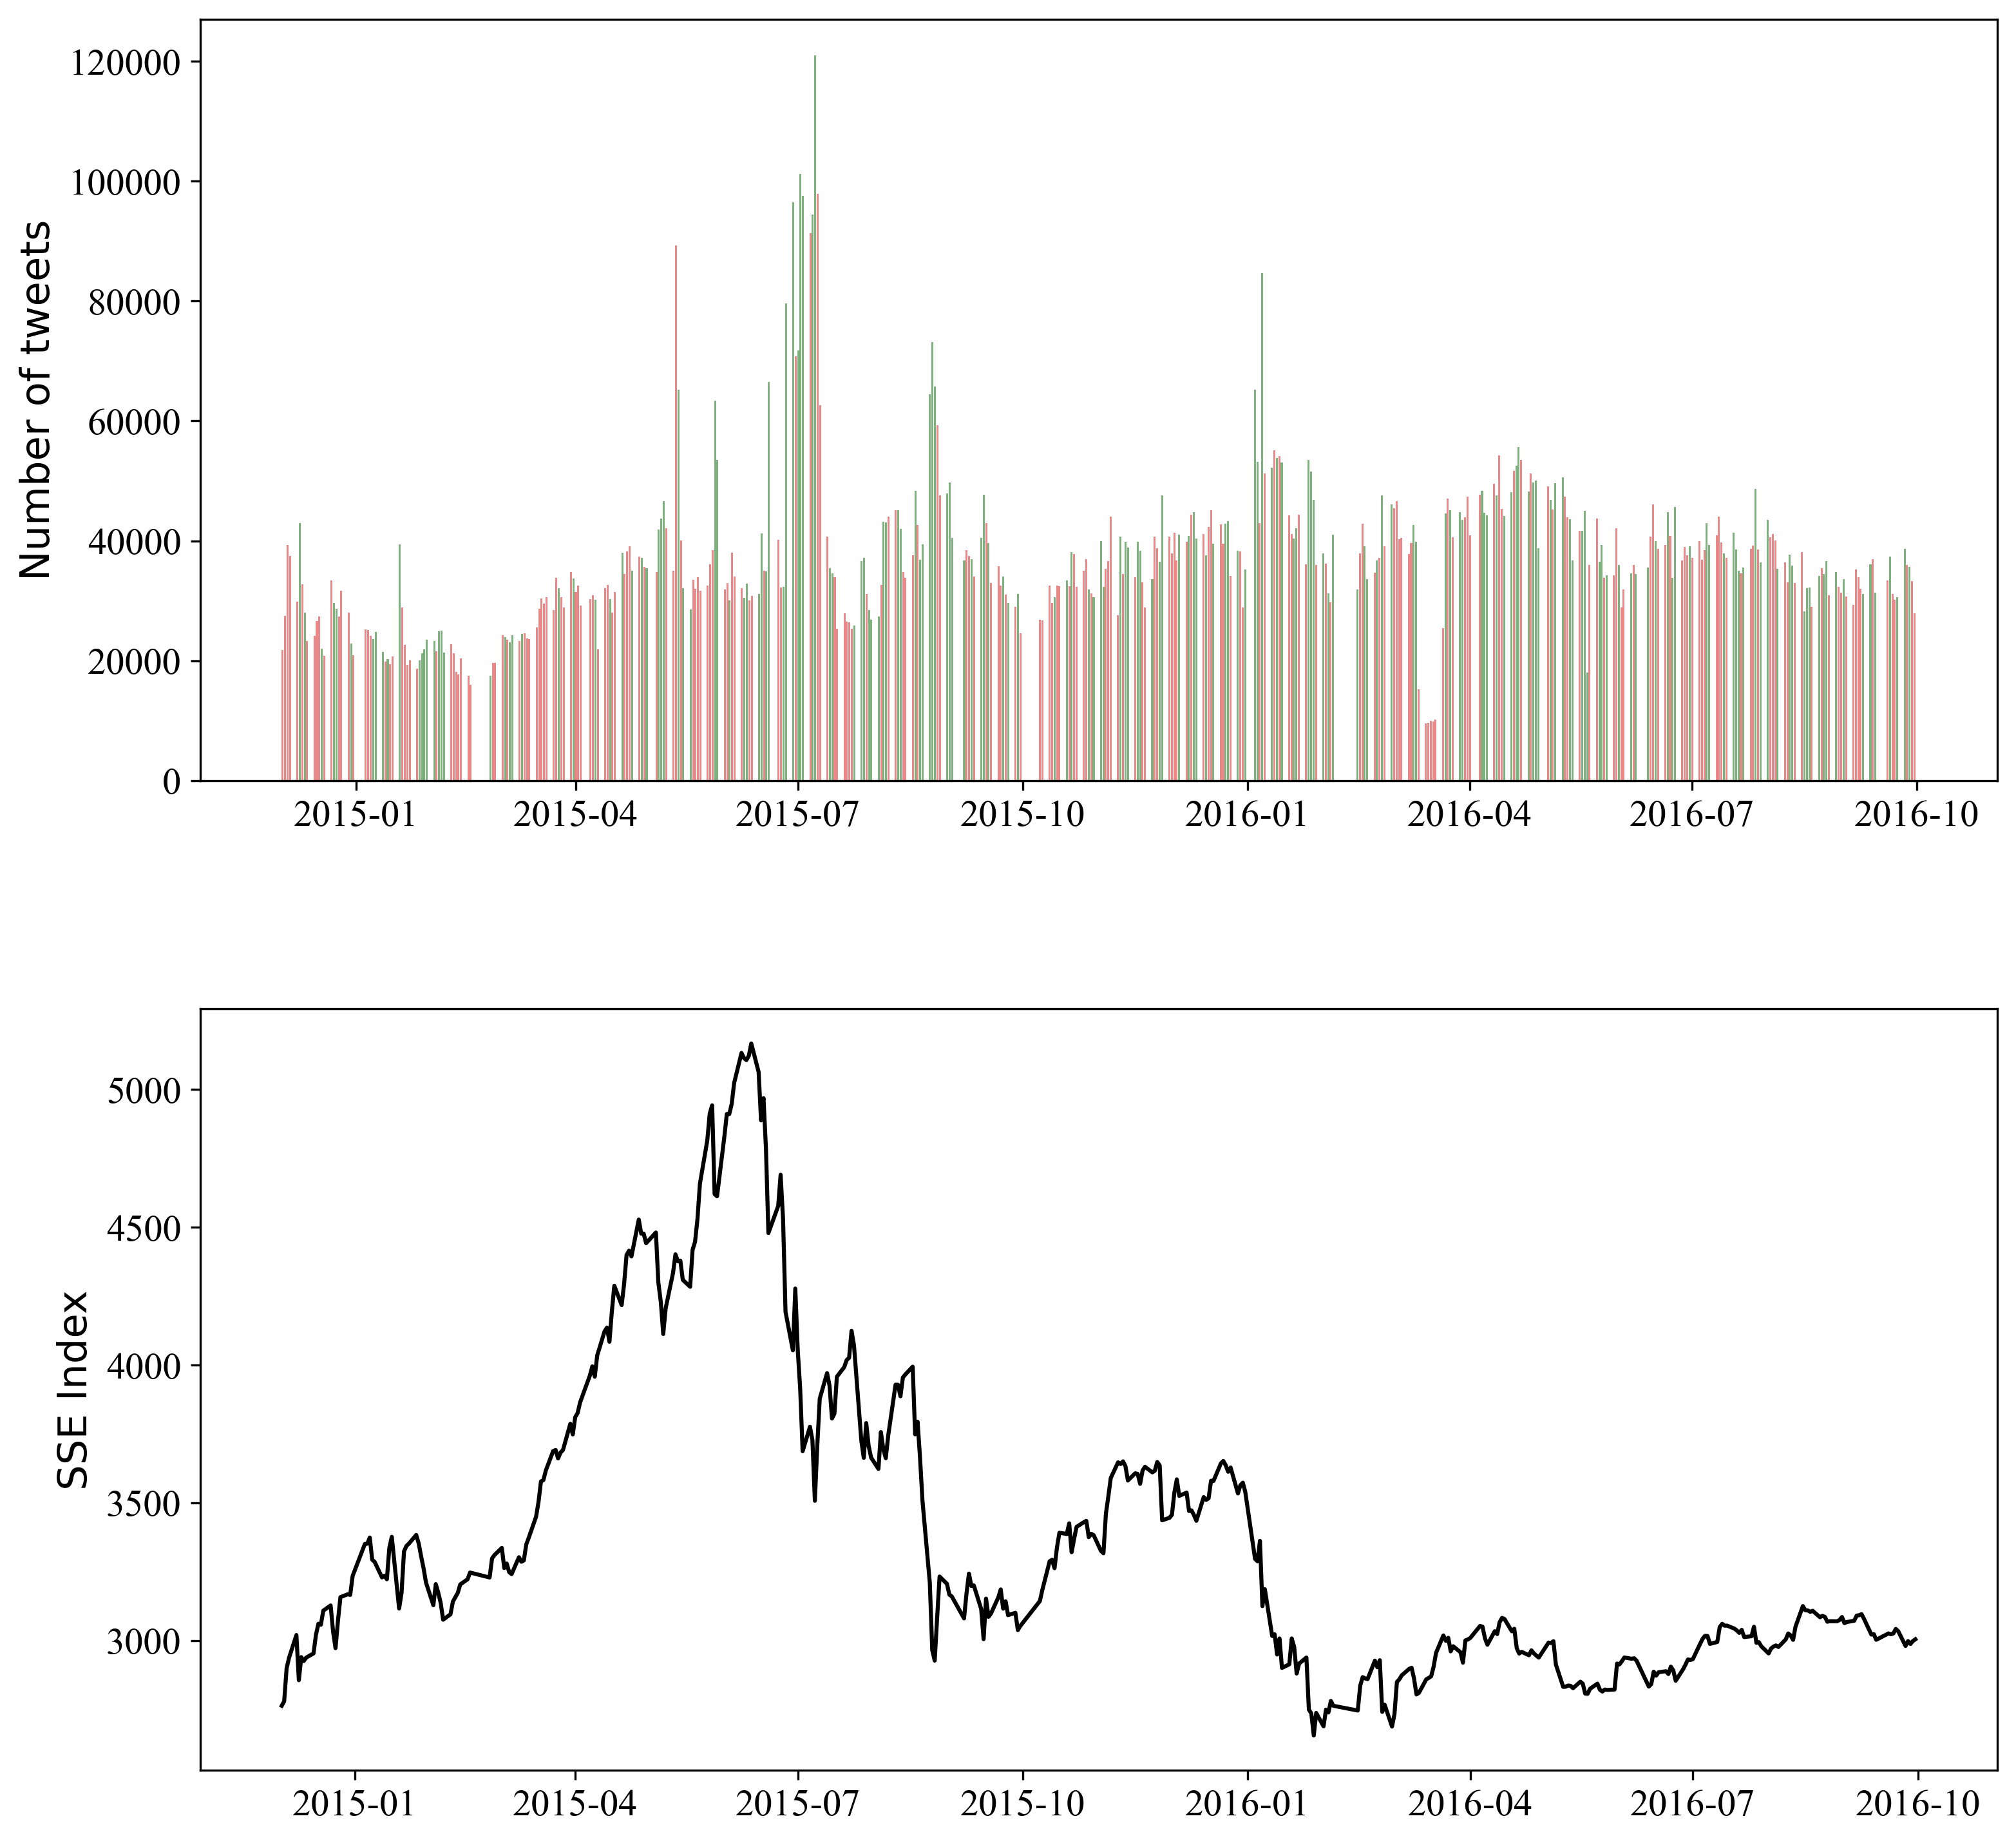

In [6]:
da = pd.read_csv('C:/Users/Lenovo/yan/D/数据/olhc.csv')

da['date'] = pd.to_datetime(da['date'])
da.set_index('date', drop= False, inplace=False)  # Drop:是否删掉原数据列，inplace:是否修改原dataframe
plt.figure(figsize=(12,12), dpi=300)

values_1 = da['su']
values_2 = da['Clsindex']
index = da['date']

plt.subplot(211)
plt.bar(index, values_1,color=colors_450)
plt.xlabel('')
plt.ylabel('Number of tweets',fontdict={'weight': 'normal', 'size': 15})
plt.yticks(fontproperties = 'Times New Roman',size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.subplots_adjust(hspace=0.3)  #调整子图上下距离    

plt.subplot(212)
plt.plot(index,values_2,color = 'k')
plt.xlabel('')
plt.ylabel('SSE Index',fontdict={'weight': 'normal', 'size': 15})

plt.yticks(fontproperties = 'Times New Roman',size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
#plt.savefig('C:/Users/Lenovo/Desktop/论文补充资料/pdf_figure/time_series_plot_color.pdf',dpi = 300)

plt.show()